In [8]:
import torchvision
import torch.nn as nn
import torch.nn.functional as nnf
import torch
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms.functional import to_tensor, normalize
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from torchvision import transforms, models
from torchvision.datasets import Food101

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
print(torch.cuda.get_device_name(0))

def test_acc(net: nn.Module, test_loader: DataLoader):

  net.to(device)
  net.eval()
  
  total = 0
  correct = 0

  for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    total += labels.size(0)

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum().item()

  return correct / total * 100

def train_fn(epochs: int, train_loader: DataLoader, test_loader: DataLoader,
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer, train_dataset_length):

  losses = []
  accuracies = []

  net.to(device)

  for e in range(epochs):
    net.train()
    running_loss = 0.0

    for images, labels in train_loader:
      images, labels = images.to(device), labels.type(torch.LongTensor).to(device)

      optimizer.zero_grad()
      outputs = net(images)
      loss = loss_fn(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / train_dataset_length

    print(f"Loss-ul la finalul epocii {e + 1}: {epoch_loss}")

    acc = test_acc(net, test_loader)
    print(f"Acuratetea la finalul epocii {e + 1} este {acc:.2f}%")

    losses.append(epoch_loss)
    accuracies.append(acc)

  loss_graph(losses)
  accuracy_graph(accuracies)

def loss_graph(losses):
    plt.plot(losses)

    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

def accuracy_graph(accuracies):
    plt.plot(accuracies)

    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

cuda
NVIDIA GeForce RTX 4060 Laptop GPU


Training started
Loss-ul la finalul epocii 1: 2.3952961319586623
Acuratetea la finalul epocii 1 este 54.30%
Loss-ul la finalul epocii 2: 2.0039056342128085
Acuratetea la finalul epocii 2 este 56.31%
Loss-ul la finalul epocii 3: 1.9141246821652151
Acuratetea la finalul epocii 3 este 58.34%
Loss-ul la finalul epocii 4: 1.8582721671680413
Acuratetea la finalul epocii 4 este 59.47%
Loss-ul la finalul epocii 5: 1.8170367962613752
Acuratetea la finalul epocii 5 este 60.59%
Loss-ul la finalul epocii 6: 1.7876946418859778
Acuratetea la finalul epocii 6 este 60.49%
Loss-ul la finalul epocii 7: 1.7544861776081249
Acuratetea la finalul epocii 7 este 60.86%
Loss-ul la finalul epocii 8: 1.7346703455267174
Acuratetea la finalul epocii 8 este 61.45%
Loss-ul la finalul epocii 9: 1.7062627940602821
Acuratetea la finalul epocii 9 este 61.76%
Loss-ul la finalul epocii 10: 1.687974949049871
Acuratetea la finalul epocii 10 este 62.06%
Loss-ul la finalul epocii 11: 1.6750456442061823
Acuratetea la finalul e

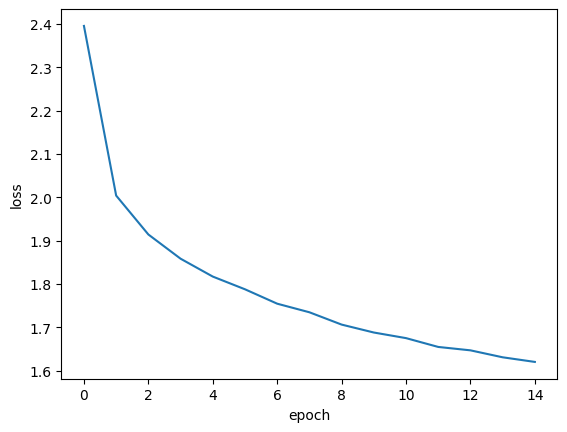

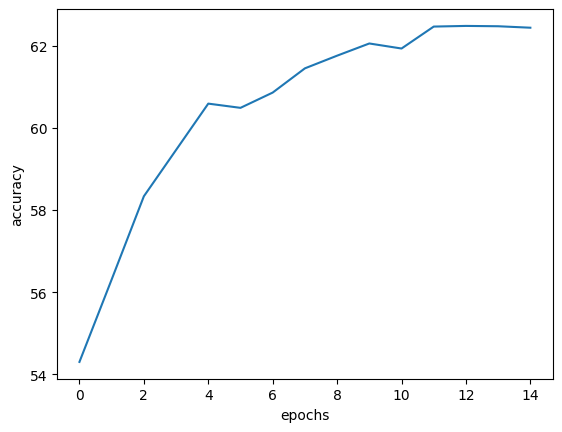

Duration of training: 437.5501103480657


In [9]:
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the datasets
train_dataset = Food101(root='C:/Users/Vlad Talpiga.VLR_PROJAMZ/OneDrive - Valrom Industrie SRL/Desktop/IAVA/Proiect/FoodClassifier/data', split='train', transform=transform, download=True)
test_dataset = Food101(root='C:/Users/Vlad Talpiga.VLR_PROJAMZ/OneDrive - Valrom Industrie SRL/Desktop/IAVA/Proiect/FoodClassifier/data', split='test', transform=transform, download=True)

# Create data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class CustomClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CustomClassifier, self).__init__()

        self.classifier = nn.Sequential(
            # nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)

num_classes = len(train_dataset.classes)
resnet = models.resnet18(pretrained=True)
resnet = nn.Sequential(*list(resnet.children())[:-1])

# Freeze all layers except the final classification layer
for param in resnet.parameters():
    param.requires_grad = False

resnet = nn.Sequential(
    resnet,
    CustomClassifier(num_classes)
)

# print(*list(resnet.children()))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

epochs = 15
start = time.time()
print('Training started')

train_fn(epochs, train_loader, test_loader, resnet, loss_fn, optimizer, len(train_dataset))

end = time.time()
print(f'Duration of training: {(end - start) / 60}')

torch.save(resnet.state_dict(), 'resnet_18_multiplefclayers.pkl')
